# Prof. Michael Madden
### Machine Learning & Data Mining Research Group
### National University of Ireland Galway

### Simple Linear Regression Example

This is a very simple but correct implementation of the Gradient Descent algorithm for
Linear Regression with 1 input variable.
Note that theta0 and theta1 are updated simultaneously, as required for correctness of the algorithm:
this means that we compute new values for them using their old values before changing either value.

By Michael Madden, 2016-2018, based on earlier Java code I wrote.

<i>This code is may be used freely without restriction, though attribution of my authorship would be appreciated.</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

# Display plots inline in notebook
%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 6]

# Use ggplot style to create plots that are styled to look like R's
plt.style.use('ggplot')

In [2]:
# Computes h(x) = theta0 + theta1 . x 
def h(x): 
   return theta0 + theta1*x

# Computes partial derivative of J wrt theta0 
def dJ_dtheta0(x, y):
   sum = 0
   for i in range (0, len(x)): 
      sum += h(x[i]) - y[i]
   return sum / len(x)

# Computes partial derivative of J wrt theta1 
def dJ_dtheta1(x, y):
   sum = 0
   for i in range (0, len(x)):
      sum += (h(x[i]) - y[i]) * x[i]
   return sum / len(x)



In [3]:
def batch_gradient_descent(x, y, alpha=0.01, tol=1e-8, maxiter=15000):
    """
    Perform batch gradient descent.
    Algorithm settings:
        alpha = learning rate 
        tol = tolerance to determine convergence
        maxiter = maximum number of iterations (in case convergence is not reached).
    """
    
    # other variables needed
    itr = 0
    delta0 = 99.0
    delta1 = 99.0
    global theta0
    global theta1
    
    while (abs(delta1) > tol) or (abs(delta0) > tol):
      # Simultaneous updates of thetas: compute all changes first, then update all thetas with them
      delta0 = alpha * dJ_dtheta0(x,y)
      delta1 = alpha * dJ_dtheta1(x,y)
    
      itr=itr+1
      theta0 -= delta0
      theta1 -= delta1

      if (itr %20 == 0):
         updatePlot(plotfig, plotax);

      if (itr > maxiter): 
         break

    print ("\nFinished after ", itr, " iterations: theta_0=", theta0, ", theta_1=", theta1)

In [4]:
def initPlot():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()

    ax.plot(x, y, 'ro')
    ax.plot([x[0], x[-1]], [h(x[0]), h(x[-1])], color='b', linestyle='-', linewidth=2)

    display(fig)
    return fig, ax

In [5]:
def updatePlot(fig, ax):
    ax.cla()
    ax.plot(x, y, 'ro')
    ax.plot([x[0], x[-1]], [h(x[0]), h(x[-1])], color='b', linestyle='-', linewidth=2)
    
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    
    display(fig)
    clear_output(wait=True)    


Finished after  963  iterations: theta_0= nan , theta_1= nan


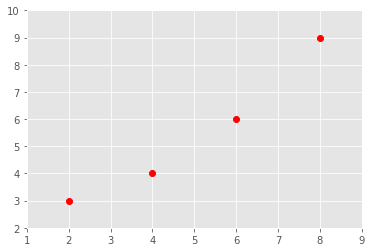

In [13]:
## Very simple dataset
# Note: for this data, correct answers are theta0=0.5, theta1=1.0.
x = [2, 4, 6, 8]
y = [3, 4, 6, 9]

# Slightly less simple dataset
#x = [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 14, 15, 17, 18, 19, 20]
#y = [-2, -4, -5, -8, -5, -7, -8, -10, -12, -12, -14, -14, -15, -16, -16, -19, -18, -19]

# axis ranges
xmin=min(x)-1
xmax=max(x)+1
ymin=min(y)-1
ymax=max(y)+1

# Defining theta0 and theta1 at module level for convenience, since they are used in multiple functions.
# initial guesses set here. 0,0 are typical. Going to start with bad guesses so we can see iterations clearly.
theta0 = 20.0
theta1 = -1.0

(plotfig, plotax) = initPlot()

# Perform the gradient descent
batch_gradient_descent(x, y, 0.1, 1e-6, 12000)